# GPN-MSA Testing with RegBase Test Datasets

## Setup environment 

In [ ]:
# only need once for GPN-MSA use
# !pip install git+https://github.com/songlab-cal/gpn.git

In [ ]:
# !ldconfig /usr/lib64-nvidia

In [1]:
from gpn.data import GenomeMSA, Tokenizer
import gpn.model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import torch
from transformers import AutoModel, AutoModelForMaskedLM

/cm/shared/apps/spack/0.17.3/cpu/b/opt/spack/linux-rocky8-zen/gcc-8.5.0/anaconda3-2021.05-q4munrgvh7qp4o7r3nzcdkbuph4z7375/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
from datasets import load_dataset, disable_caching
from gpn.data import load_dataset_from_file_or_dir

In [3]:
dataset_prefix = "/expanse/lustre/projects/nji102/sgriesmer/gpn/Datasets/reg_base/test_dataset/"

In [4]:
input_file =  dataset_prefix + "test.parquet"
dataset = load_dataset_from_file_or_dir(input_file, split="test", is_file=True)

FileNotFoundError: [Errno 2] No such file or directory: '/expanse/lustre/projects/nji102/sgriesmer/gpn/Datasets/reg_base/test_dataset/test.parquet'

## Rare Pathogenic Dataset

## Load scored dataset (if previously created)

In [4]:
rarpat_dataset = pd.read_csv(dataset_prefix + "Rare_Patho_SNV_dataset_XY-named-plus-gpncons.csv", sep=',')
rarpat_dataset.head(), rarpat_dataset.shape

(         Name    gpn_score  label
 0  RARPAT0001  -0.48000175      0
 1  RARPAT0002  -0.69967383      0
 2  RARPAT0003  -0.32448995      0
 3  RARPAT0004    2.1132026      0
 4  RARPAT0005    1.6021712      0,
 (102, 3))

## Drop rows with "No scores"

In [5]:
rarpat_dataset = rarpat_dataset[rarpat_dataset["gpn_score"].str.contains("No score") == False]
rarpat_dataset

,Name,gpn_score,label
0,RARPAT0001,-0.48000175,0
1,RARPAT0002,-0.69967383,0
2,RARPAT0003,-0.32448995,0
3,RARPAT0004,2.1132026,0
4,RARPAT0005,1.6021712,0
...,...,...,...
92,RARPAT0093,-2.7773783,1
98,RARPAT0099,-5.710621,1
99,RARPAT0100,-3.4609902,1
100,RARPAT0101,1.2280825,0


## Convert gpn_score to floating point

In [6]:
rarpat_dataset['gpn_score'] = rarpat_dataset['gpn_score'].astype(float)
rarpat_dataset

,Name,gpn_score,label
0,RARPAT0001,-0.480002,0
1,RARPAT0002,-0.699674,0
2,RARPAT0003,-0.324490,0
3,RARPAT0004,2.113203,0
4,RARPAT0005,1.602171,0
...,...,...,...
92,RARPAT0093,-2.777378,1
98,RARPAT0099,-5.710621,1
99,RARPAT0100,-3.460990,1
100,RARPAT0101,1.228082,0


<AxesSubplot:xlabel='gpn_score', ylabel='Count'>

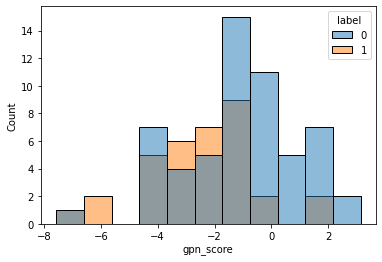

In [7]:
sns.histplot(data=rarpat_dataset, x="gpn_score", hue="label")

## Calculate metrics

In [8]:
from sklearn.metrics import roc_auc_score, average_precision_score

AUROC = roc_auc_score(rarpat_dataset.label==1, -rarpat_dataset.gpn_score)
AUPRC = average_precision_score(rarpat_dataset.label==1, -rarpat_dataset.gpn_score)
AUROC, AUPRC

(0.7115583075335398, 0.5762948003718266)

## Plot ROC curve

In [9]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(rarpat_dataset.label==1, -rarpat_dataset.gpn_score)

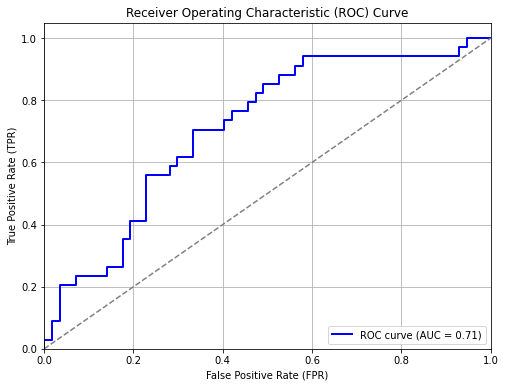

In [10]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {AUROC:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## ASD Dataset

## Load scored dataset (if previously created)

In [11]:
asd_dataset = pd.read_csv(dataset_prefix + "ASD_denovo_SNV_dataset_XY-named-plus-gpncons.csv", sep=',')
asd_dataset.head(), asd_dataset.shape

(      Name     gpn_score  label
 0  ASD0001      No score      0
 1  ASD0002      No score      0
 2  ASD0003  -0.074192345      0
 3  ASD0004      No score      0
 4  ASD0005    -1.4429572      0,
 (107, 3))

## Drop rows with "No score"

In [12]:
asd_dataset = asd_dataset[asd_dataset["gpn_score"].str.contains("No score") == False]
asd_dataset

,Name,gpn_score,label
2,ASD0003,-0.074192345,0
4,ASD0005,-1.4429572,0
6,ASD0007,1.4096316,0
7,ASD0008,-1.3236345,0
8,ASD0009,-1.4899375,0
9,ASD0010,-1.7419289,0
10,ASD0011,0.26448828,0
11,ASD0012,-1.2060157,0
14,ASD0015,-0.594542,0
16,ASD0017,-2.149902,0


## Convert 'gpn_score' to floating point

In [13]:
asd_dataset['gpn_score'] = asd_dataset['gpn_score'].astype(float)
asd_dataset

,Name,gpn_score,label
2,ASD0003,-0.074192,0
4,ASD0005,-1.442957,0
6,ASD0007,1.409632,0
7,ASD0008,-1.323635,0
8,ASD0009,-1.489937,0
9,ASD0010,-1.741929,0
10,ASD0011,0.264488,0
11,ASD0012,-1.206016,0
14,ASD0015,-0.594542,0
16,ASD0017,-2.149902,0


## Plot shows differentiation between Common and COSMIC/Frequent mutations

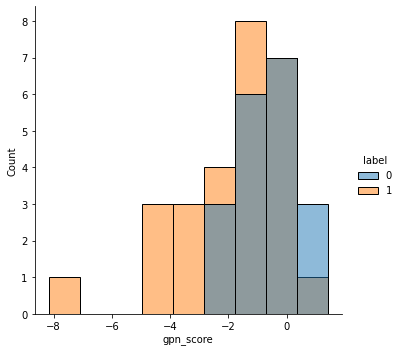

In [14]:
sns.displot(data=asd_dataset, hue="label", x="gpn_score")

## Calculate metrics

In [15]:
from sklearn.metrics import roc_auc_score, average_precision_score

gpn_score = asd_dataset.gpn_score
AUROC = roc_auc_score(asd_dataset.label==1, -gpn_score)
AUPRC = average_precision_score(asd_dataset.label==1, -gpn_score)
AUROC, AUPRC

(0.6666666666666666, 0.7927250112551882)

## Plot ROC curve

In [16]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(asd_dataset.label==1, -gpn_score)

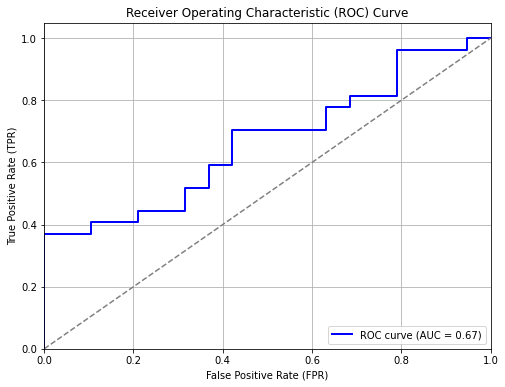

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {AUROC:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [18]:
## GTEx Dataset

## Load Dataset to be Scored (if previously created)

In [19]:
## Load scored dataset (if previously created)

In [20]:
gtex_dataset = pd.read_csv(dataset_prefix + "GTEx_eQTL_dataset_XY-named-plus-gpncons.csv", sep=',')
gtex_dataset.head(), gtex_dataset.shape

(       Name   gpn_score  label
 0  GTEX0001   0.6505338      0
 1  GTEX0002   1.3264322      0
 2  GTEX0003   -0.486378      0
 3  GTEX0004    1.846808      0
 4  GTEX0005  -2.2682674      0,
 (796, 3))

## Drop rows with "No score"

In [21]:
gtex_dataset = gtex_dataset[gtex_dataset["gpn_score"].str.contains("No score") == False]
gtex_dataset

,Name,gpn_score,label
0,GTEX0001,0.6505338,0
1,GTEX0002,1.3264322,0
2,GTEX0003,-0.486378,0
3,GTEX0004,1.846808,0
4,GTEX0005,-2.2682674,0
...,...,...,...
791,GTEX0792,-6.0945377,1
792,GTEX0793,-4.1549673,1
793,GTEX0794,-1.0315851,1
794,GTEX0795,-5.107665,1


## Convert 'gpn_score' to floating point

In [22]:
gtex_dataset['gpn_score'] = gtex_dataset['gpn_score'].astype(float)
gtex_dataset

,Name,gpn_score,label
0,GTEX0001,0.650534,0
1,GTEX0002,1.326432,0
2,GTEX0003,-0.486378,0
3,GTEX0004,1.846808,0
4,GTEX0005,-2.268267,0
...,...,...,...
791,GTEX0792,-6.094538,1
792,GTEX0793,-4.154967,1
793,GTEX0794,-1.031585,1
794,GTEX0795,-5.107665,1


## Plot shows differentiation between Common and OMIM/Pathogenic mutations

<AxesSubplot:xlabel='gpn_score', ylabel='Count'>

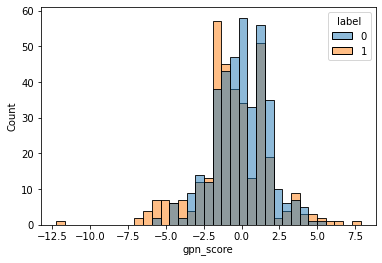

In [23]:
sns.histplot(data=gtex_dataset, x="gpn_score", hue="label")

In [24]:
from sklearn.metrics import roc_auc_score, average_precision_score
AUROC = roc_auc_score(gtex_dataset.label==1, -gtex_dataset.gpn_score)
AUPRC = average_precision_score(gtex_dataset.label==1, -gtex_dataset.gpn_score)
AUROC, AUPRC

(0.5785601681555439, 0.5765356936242919)

## Plot ROC curve

In [25]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(gtex_dataset.label==1, -gtex_dataset.gpn_score)

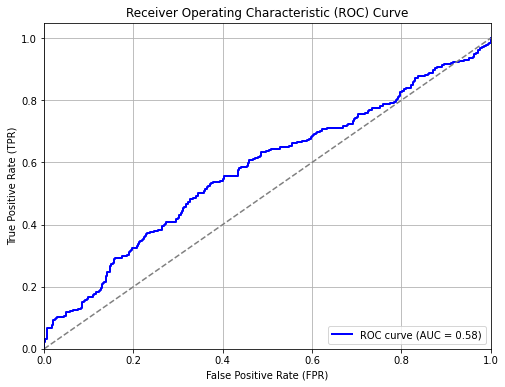

In [26]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {AUROC:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [27]:
## Load dataset to be scored

In [28]:
SOMEQTL_dataset = pd.read_csv(dataset_prefix + "Somatic_eQTL_dataset_XY-named-plus-gpncons.csv", sep=',')
SOMEQTL_dataset.head(), SOMEQTL_dataset.shape

(           Name gpn_score  label
 0  SOMEQTL00001  No score      1
 1  SOMEQTL00002  No score      1
 2  SOMEQTL00003  No score      1
 3  SOMEQTL00004  No score      1
 4  SOMEQTL00005  No score      1,
 (7513, 3))

In [29]:
## Drop rows with gpn_score is "No score"

In [30]:
SOMEQTL_dataset = SOMEQTL_dataset[SOMEQTL_dataset["gpn_score"].str.contains("No score") == False]
SOMEQTL_dataset

,Name,gpn_score,label
7,SOMEQTL00008,0.78159124,1
10,SOMEQTL00011,-1.5980558,1
14,SOMEQTL00015,-3.4298298,1
15,SOMEQTL00016,-0.97268504,1
16,SOMEQTL00017,-1.4645039,1
...,...,...,...
7502,SOMEQTL07503,0.3407907,0
7503,SOMEQTL07504,-1.6340823,0
7505,SOMEQTL07506,-7.273632,0
7507,SOMEQTL07508,-1.4786688,0


In [31]:
## Convert gpn_score to floating point

In [32]:
SOMEQTL_dataset['gpn_score'] = SOMEQTL_dataset['gpn_score'].astype(float)
SOMEQTL_dataset

,Name,gpn_score,label
7,SOMEQTL00008,0.781591,1
10,SOMEQTL00011,-1.598056,1
14,SOMEQTL00015,-3.429830,1
15,SOMEQTL00016,-0.972685,1
16,SOMEQTL00017,-1.464504,1
...,...,...,...
7502,SOMEQTL07503,0.340791,0
7503,SOMEQTL07504,-1.634082,0
7505,SOMEQTL07506,-7.273632,0
7507,SOMEQTL07508,-1.478669,0


In [33]:
## Plot values

<AxesSubplot:xlabel='gpn_score', ylabel='Count'>

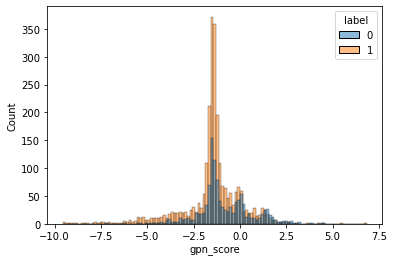

In [34]:
sns.histplot(data=SOMEQTL_dataset, x="gpn_score", hue="label")

In [35]:
## Find metrics

In [36]:
from sklearn.metrics import roc_auc_score, average_precision_score
AUROC = roc_auc_score(SOMEQTL_dataset.label==1, -SOMEQTL_dataset.gpn_score)
AUPRC = average_precision_score(SOMEQTL_dataset.label==1, -SOMEQTL_dataset.gpn_score)
AUROC, AUPRC

(0.6001034340904089, 0.7626000737278347)

In [37]:
## Plot ROC curve

In [38]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(SOMEQTL_dataset.label==1, -SOMEQTL_dataset.gpn_score)

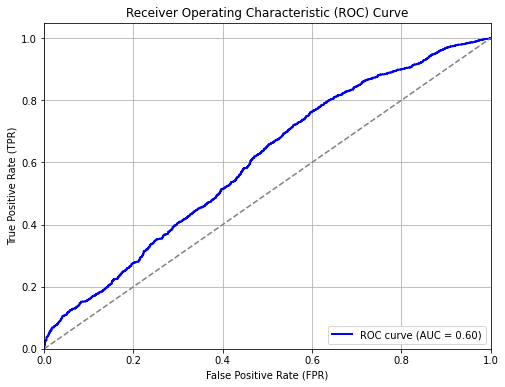

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {AUROC:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [40]:
## Load dataset to be scored

In [41]:
GWAS8_dataset = pd.read_csv(dataset_prefix + "GWAS_SNP_5E-8_dataset_XY-named-plus-gpncons.csv", sep=',')
GWAS8_dataset.head(), GWAS8_dataset.shape

(         Name    gpn_score  label
 0  GWAS800001    1.1061312      0
 1  GWAS800002  0.012135983      0
 2  GWAS800003  0.023739576      0
 3  GWAS800004   0.32080758      0
 4  GWAS800005  -0.78027433      0,
 (21725, 3))

In [42]:
## Drop rows with gpn_score is "No score"

In [46]:
GWAS8_dataset = GWAS8_dataset[GWAS8_dataset["gpn_score"].str.contains("No score") == False]
GWAS8_dataset

,Name,gpn_score,label
0,GWAS800001,1.1061312,0
1,GWAS800002,0.012135983,0
2,GWAS800003,0.023739576,0
3,GWAS800004,0.32080758,0
4,GWAS800005,-0.78027433,0
...,...,...,...
21720,GWAS821721,-2.7502012,1
21721,GWAS821722,-4.0663514,1
21722,GWAS821723,1.547934,1
21723,GWAS821724,-1.398222,1


In [47]:
## Convert gpn_score to floating point

In [48]:
GWAS8_dataset['gpn_score'] = GWAS8_dataset['gpn_score'].astype(float)
GWAS8_dataset

,Name,gpn_score,label
0,GWAS800001,1.106131,0
1,GWAS800002,0.012136,0
2,GWAS800003,0.023740,0
3,GWAS800004,0.320808,0
4,GWAS800005,-0.780274,0
...,...,...,...
21720,GWAS821721,-2.750201,1
21721,GWAS821722,-4.066351,1
21722,GWAS821723,1.547934,1
21723,GWAS821724,-1.398222,1


In [49]:
## Plot values

<AxesSubplot:xlabel='gpn_score', ylabel='Count'>

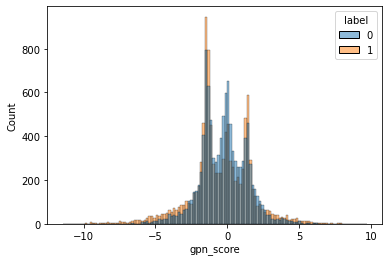

In [50]:
sns.histplot(data=GWAS8_dataset, x="gpn_score", hue="label")

In [51]:
## Find metrics

In [52]:
from sklearn.metrics import roc_auc_score, average_precision_score
AUROC = roc_auc_score(GWAS8_dataset.label==1, -GWAS8_dataset.gpn_score)
AUPRC = average_precision_score(GWAS8_dataset.label==1, -GWAS8_dataset.gpn_score)
AUROC, AUPRC

(0.5305521741231412, 0.5595565185441693)

In [53]:
## Plot ROC_curve

In [54]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(GWAS8_dataset.label==1, -GWAS8_dataset.gpn_score)

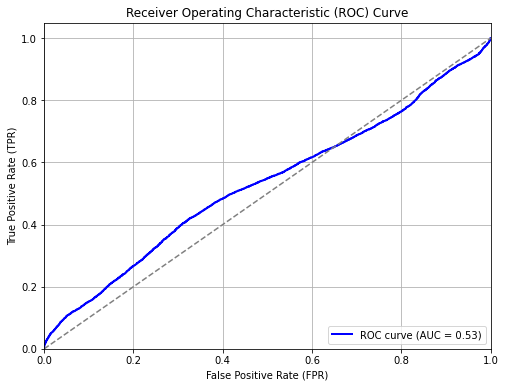

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {AUROC:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [56]:
## Load dataset to be scored

In [57]:
GWAS5_dataset = pd.read_csv(dataset_prefix + "GWAS_SNP_1E-5_dataset_XY-named-plus-gpncons.csv", sep=',')
GWAS5_dataset.head(), GWAS5_dataset.shape

(         Name    gpn_score  label
 0  GWAS500001    2.6500473      0
 1  GWAS500002  -0.63982874      0
 2  GWAS500003   -0.4942252      0
 3  GWAS500004    2.0301213      0
 4  GWAS500005   0.38736093      0,
 (60593, 3))

In [58]:
## Drop rows with gpn_score of "No score"

In [59]:
GWAS5_dataset = GWAS5_dataset[GWAS5_dataset["gpn_score"].str.contains("No score") == False]
GWAS5_dataset

,Name,gpn_score,label
0,GWAS500001,2.6500473,0
1,GWAS500002,-0.63982874,0
2,GWAS500003,-0.4942252,0
3,GWAS500004,2.0301213,0
4,GWAS500005,0.38736093,0
...,...,...,...
60531,GWAS560532,0.4160803,1
60532,GWAS560533,1.0460266,1
60533,GWAS560534,0.07811129,1
60534,GWAS560535,-0.24659777,1


In [60]:
## Convert gpn_score to floating point

In [61]:
GWAS5_dataset['gpn_score'] = GWAS5_dataset['gpn_score'].astype(float)
GWAS5_dataset

,Name,gpn_score,label
0,GWAS500001,2.650047,0
1,GWAS500002,-0.639829,0
2,GWAS500003,-0.494225,0
3,GWAS500004,2.030121,0
4,GWAS500005,0.387361,0
...,...,...,...
60531,GWAS560532,0.416080,1
60532,GWAS560533,1.046027,1
60533,GWAS560534,0.078111,1
60534,GWAS560535,-0.246598,1


In [62]:
## Plot values

<AxesSubplot:xlabel='gpn_score', ylabel='Count'>

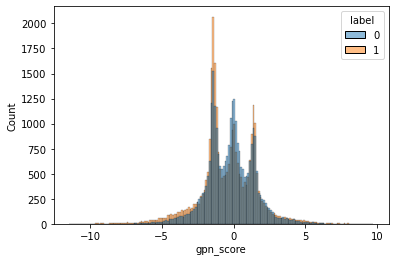

In [63]:
sns.histplot(data=GWAS5_dataset, x="gpn_score", hue="label")

In [64]:
## Find metrics

In [65]:
from sklearn.metrics import roc_auc_score, average_precision_score
AUROC = roc_auc_score(GWAS5_dataset.label==1, -GWAS5_dataset.gpn_score)
AUPRC = average_precision_score(GWAS5_dataset.label==1, -GWAS5_dataset.gpn_score)
AUROC, AUPRC

(0.5358259359366295, 0.5606955577379185)

In [66]:
## Plot ROC_curve

In [67]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(GWAS5_dataset.label==1, -GWAS5_dataset.gpn_score)

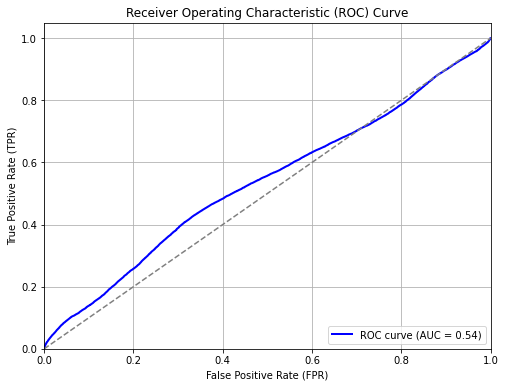

In [68]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {AUROC:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [ ]:
## Load dataset to be scored

In [69]:
Brown_dataset = pd.read_csv(dataset_prefix + "Brown_eQTL_dataset_XY-named-plus-gpncons.csv", sep=',')
Brown_dataset.head(), Brown_dataset.shape

(       Name   gpn_score  label
 0  BWN00001    2.398219      1
 1  BWN00002  -4.2818213      1
 2  BWN00003  -3.0589824      1
 3  BWN00004  0.21149534      1
 4  BWN00005  -1.0782819      1,
 (67635, 3))

In [70]:
## Drop rows with gpn_score of "No score"

In [71]:
Brown_dataset = Brown_dataset[Brown_dataset["gpn_score"].str.contains("No score") == False]
Brown_dataset

,Name,gpn_score,label
0,BWN00001,2.398219,1
1,BWN00002,-4.2818213,1
2,BWN00003,-3.0589824,1
3,BWN00004,0.21149534,1
4,BWN00005,-1.0782819,1
...,...,...,...
67630,BWN67631,-0.20225191,0
67631,BWN67632,0.18755168,0
67632,BWN67633,-1.3392522,0
67633,BWN67634,-0.7828549,0


In [72]:
## Convert gpn_score to floating point

In [73]:
Brown_dataset['gpn_score'] = Brown_dataset['gpn_score'].astype(float)
Brown_dataset

,Name,gpn_score,label
0,BWN00001,2.398219,1
1,BWN00002,-4.281821,1
2,BWN00003,-3.058982,1
3,BWN00004,0.211495,1
4,BWN00005,-1.078282,1
...,...,...,...
67630,BWN67631,-0.202252,0
67631,BWN67632,0.187552,0
67632,BWN67633,-1.339252,0
67633,BWN67634,-0.782855,0


In [74]:
## Find metrics

In [75]:
from sklearn.metrics import roc_auc_score, average_precision_score
AUROC = roc_auc_score(Brown_dataset.label==1, -Brown_dataset.gpn_score)
AUPRC = average_precision_score(Brown_dataset.label==1, -Brown_dataset.gpn_score)
AUROC, AUPRC

(0.5334072072208633, 0.5035345761751593)

In [76]:
## Plot ROC_curve

In [77]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Brown_dataset.label==1, -Brown_dataset.gpn_score)

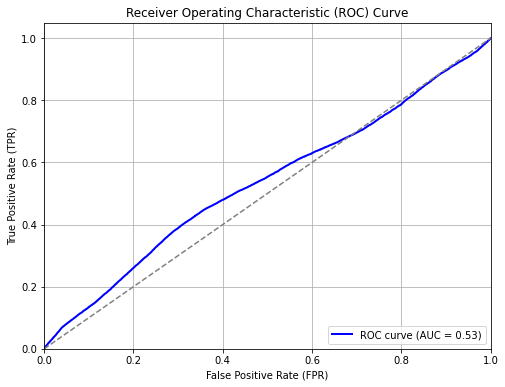

In [78]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', lw=2, label=f'ROC curve (AUC = {AUROC:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()